<a href="https://colab.research.google.com/github/pmendizabal/webscraping_tasks/blob/main/W_task1_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introducción a Webscraping en Python

*En este código se muestran los fundamentos para empezar a realizar un scraper en la web y extraer información*


##¿Qué es HTML?

El primer paso consiste en investigar el HTML de una página web, el lenguaje de programación utilizado para definir y estructurar el contenido de una sola página. HTML tiene una serie de elementos que están representados por etiquetas (vea todos los diferentes tipos de etiquetas y sus atributos):




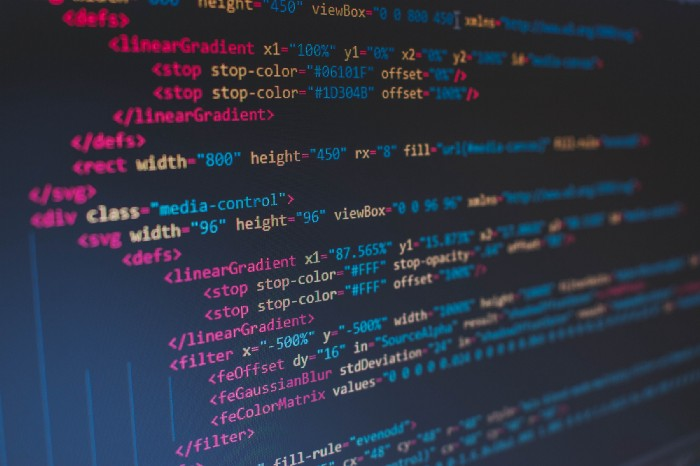

Con estas etiquetas, nuestras principales bibliotecas de scraping pueden apuntar y analizar información de manera efectiva durante todo el proceso de scraping.

###Práctica

In [ ]:
import requests
from bs4 import BeautifulSoup as bs

In [ ]:
r = requests.get("https://en.wikipedia.org/wiki/Toy_Story_3")
print(r)

In [ ]:
# Instanciamos la clase que viene de BS a un objeto
soup = bs(r.content)

# Print out the HTML
contents = soup.prettify()
print(contents)

In [ ]:
#Lo que nos importa es el cuadrito de información que tiene datos sobre la pelicula
info_box = soup.find(class_="infobox vevent")
print(info_box.prettify())

In [ ]:
info_rows = info_box.find_all("tr")
for row in info_rows:
  print(row.prettify())

In [ ]:
movie_info = {}

for index, row in enumerate(info_rows):
  if index == 0:
    movie_info['title'] = row.find("th").get_text()
  elif index ==1:
    continue 
  else:
    content_key = row.find("th").get_text()
    content_value = row.find("td").get_text()
    movie_info[content_key] = content_value

print(movie_info)


In [ ]:
def get_content_clean(row_data):
  if row_data.find("li"):
    return [li.get_text() for li in row_data.find_all("li")]
  else:
    return row_data.get_text()

movie_info = {}

for index, row in enumerate(info_rows):
  if index == 0:
    movie_info['title'] = row.find("th").get_text()
  elif index ==1:
    continue 
  else:
    content_key = row.find("th").get_text()
    content_value = get_content_clean(row.find("td"))
    movie_info[content_key] = content_value

movie_info

###Limpiar los datos obtenidos

Primero quitamos el caracter de \xa0

In [ ]:
def get_content_clean(row_data):
  if row_data.find("li"):
    return [li.get_text().replace("\xa0", " ") for li in row_data.find_all("li")]
  else:
    return row_data.get_text().replace("\xa0", " ")

movie_info = {}

for index, row in enumerate(info_rows):
  if index == 0:
    movie_info['title'] = row.find("th").get_text()
  elif index ==1:
    continue 
  else:
    content_key = row.find("th").get_text()
    content_value = get_content_clean(row.find("td"))
    movie_info[content_key] = content_value

movie_info

In [ ]:
def get_content_clean(row_data):
  if row_data.find("li"):
    return [li.get_text(" ", strip=True).replace("\xa0", " ") for li in row_data.find_all("li")]
  else:
    return row_data.get_text(" ", strip=True).replace("\xa0", " ")

movie_info = {}

for index, row in enumerate(info_rows):
  if index == 0:
    movie_info['title'] = row.find("th").get_text(" ", strip=True)
  elif index ==1:
    continue 
  else:
    content_key = row.find("th").get_text(" ", strip=True)
    content_value = get_content_clean(row.find("td"))
    movie_info[content_key] = content_value

movie_info

In [ ]:
def get_content_clean(row_data):
  if row_data.find("li"):
    return [li.get_text(" ", strip=True).replace("\xa0", " ").replace("[1]", " ") for li in row_data.find_all("li")]
  else:
    return row_data.get_text(" ", strip=True).replace("\xa0", " ").replace("[1]", " ")

movie_info = {}

for index, row in enumerate(info_rows):
  if index == 0:
    movie_info['title'] = row.find("th").get_text(" ", strip=True)
  elif index ==1:
    continue 
  else:
    content_key = row.find("th").get_text(" ", strip=True)
    content_value = get_content_clean(row.find("td"))
    movie_info[content_key] = content_value

movie_info